In [77]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import warnings
warnings.filterwarnings('ignore')

import datetime
import json
import time
import glob
import sys
import os
import gc

from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold, train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [78]:
# import nltk
# nltk.download('movie_reviews')

In [79]:
from nltk.corpus import movie_reviews

In [80]:
negids = movie_reviews.fileids('neg')
posids = movie_reviews.fileids('pos')

In [81]:
negfeats = [movie_reviews.words(fileids=[f]) for f in negids]
posfeats = [movie_reviews.words(fileids=[f]) for f in posids]

In [82]:
movie_reviews.categories()

['neg', 'pos']

In [83]:
documents = [(list(movie_reviews.words(fileid)), category)
              for category in movie_reviews.categories()
              for fileid in movie_reviews.fileids(category)]

In [84]:
docs = [list(movie_reviews.words(fileid)) for fileid in movie_reviews.fileids()]

In [85]:
docs[:1]

[['plot',
  ':',
  'two',
  'teen',
  'couples',
  'go',
  'to',
  'a',
  'church',
  'party',
  ',',
  'drink',
  'and',
  'then',
  'drive',
  '.',
  'they',
  'get',
  'into',
  'an',
  'accident',
  '.',
  'one',
  'of',
  'the',
  'guys',
  'dies',
  ',',
  'but',
  'his',
  'girlfriend',
  'continues',
  'to',
  'see',
  'him',
  'in',
  'her',
  'life',
  ',',
  'and',
  'has',
  'nightmares',
  '.',
  'what',
  "'",
  's',
  'the',
  'deal',
  '?',
  'watch',
  'the',
  'movie',
  'and',
  '"',
  'sorta',
  '"',
  'find',
  'out',
  '.',
  '.',
  '.',
  'critique',
  ':',
  'a',
  'mind',
  '-',
  'fuck',
  'movie',
  'for',
  'the',
  'teen',
  'generation',
  'that',
  'touches',
  'on',
  'a',
  'very',
  'cool',
  'idea',
  ',',
  'but',
  'presents',
  'it',
  'in',
  'a',
  'very',
  'bad',
  'package',
  '.',
  'which',
  'is',
  'what',
  'makes',
  'this',
  'review',
  'an',
  'even',
  'harder',
  'one',
  'to',
  'write',
  ',',
  'since',
  'i',
  'generally',
  'a

In [86]:
documents[:1]

[(['plot',
   ':',
   'two',
   'teen',
   'couples',
   'go',
   'to',
   'a',
   'church',
   'party',
   ',',
   'drink',
   'and',
   'then',
   'drive',
   '.',
   'they',
   'get',
   'into',
   'an',
   'accident',
   '.',
   'one',
   'of',
   'the',
   'guys',
   'dies',
   ',',
   'but',
   'his',
   'girlfriend',
   'continues',
   'to',
   'see',
   'him',
   'in',
   'her',
   'life',
   ',',
   'and',
   'has',
   'nightmares',
   '.',
   'what',
   "'",
   's',
   'the',
   'deal',
   '?',
   'watch',
   'the',
   'movie',
   'and',
   '"',
   'sorta',
   '"',
   'find',
   'out',
   '.',
   '.',
   '.',
   'critique',
   ':',
   'a',
   'mind',
   '-',
   'fuck',
   'movie',
   'for',
   'the',
   'teen',
   'generation',
   'that',
   'touches',
   'on',
   'a',
   'very',
   'cool',
   'idea',
   ',',
   'but',
   'presents',
   'it',
   'in',
   'a',
   'very',
   'bad',
   'package',
   '.',
   'which',
   'is',
   'what',
   'makes',
   'this',
   'review',
   'an'

In [87]:
len(documents)

2000

In [88]:
len(movie_reviews.fileids())

2000

In [89]:
with open('answer1.txt', 'w') as f:
    f.write(str(len(documents)))

In [90]:
df = pd.DataFrame.from_records(documents, exclude=['docs'], columns = ['docs' , 'cat']) 
df.cat = df.cat.map({'neg':0, 'pos':1})

Proportion: 0.5 : 1


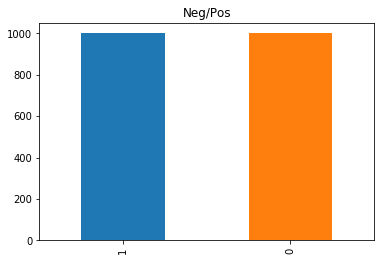

In [91]:
counts = df.cat.value_counts()
p = np.round(counts[1] / sum(counts), 2)
print('Proportion:', p , ': 1')

counts.plot(kind='bar', title='Neg/Pos');

In [92]:
with open ('answer2.txt', 'w') as f:
    f.write(str(p))

In [93]:
docs = [" ".join(x) for x in docs]

In [94]:
#tokenizer=lambda doc: doc, lowercase=False

In [95]:
vectorizer = CountVectorizer()
bow = vectorizer.fit_transform(docs)

In [96]:
bow

<2000x39659 sparse matrix of type '<class 'numpy.int64'>'
	with 666842 stored elements in Compressed Sparse Row format>

In [97]:
with open('answer3.txt', 'w') as f:
    f.write(str(bow.shape[1]))

In [98]:
LR = linear_model.LogisticRegression()

In [99]:
cross_val_score(LR, bow, df.cat, scoring = 'accuracy')

array([0.81437126, 0.84684685, 0.84684685])

In [100]:
mean_acc = np.mean(cross_val_score(LR, bow, df.cat, scoring = 'accuracy'))
mean_acc

0.8360216503929078

In [101]:
with open('answer4.txt', 'w') as f:
    f.write(str(mean_acc))

In [102]:
mean_roc_auc = np.mean(cross_val_score(LR, bow, df.cat, scoring = 'roc_auc'))
mean_roc_auc

0.9107764937833774

In [103]:
with open('answer5.txt', 'w') as f:
    f.write(str(mean_roc_auc))

In [105]:
from sklearn.pipeline import Pipeline, make_pipeline

In [106]:
mp = make_pipeline(vectorizer, LR)
mp.fit(docs, df.cat)
fp = mp.predict(docs)
cross_val_score(mp, df.cat,scoring = 'roc_auc')

AttributeError: 'int' object has no attribute 'lower'

In [107]:
vectorizer.get_feature_names()[37056]

'unfortunately'

In [108]:
LR = linear_model.LogisticRegression()
LR.fit(bow, df.cat)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [109]:
print(LR.coef_)

[[ 1.13519839e-02 -1.78935973e-02  2.51622303e-06 ... -7.15497974e-03
   3.79020749e-04 -1.40853359e-03]]


In [110]:
top_5 = np.argsort(np.abs(LR.coef_[0]))[-5:]

In [111]:
top_5

array([38417, 14159, 39195, 37056,  2954])

In [112]:
top5 = np.array(vectorizer.get_feature_names())[top_5]

In [113]:
top2 = " ".join(top5[-2:])

In [114]:
top2

'unfortunately bad'

In [38]:
with open('answer6.txt', 'w') as f:
        f.write(top2)

In [115]:
pipe_CV_LR = Pipeline([
        ('vectorizer', CountVectorizer()),
        ('LR', linear_model.LogisticRegression())
    ])
pipe_TFIDF_LR = Pipeline([
       ('TFIDF', TfidfVectorizer()),
       ('LR', linear_model.LogisticRegression())
    ])

In [123]:
def substract_means(pipeline, X, y):
    scores = cross_val_score(pipeline, X, y, cv=5, n_jobs=-1)
    mean = scores.mean()
    std = scores.std()
    return mean, std

In [116]:
pipe_CV_LR.fit(docs, df.cat)

Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('LR',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                     

In [137]:
scores_CV_LR = cross_val_score(pipe_CV_LR, docs, df.cat, cv=5, n_jobs=-1)

In [142]:
mean1 = scores_CV_LR.mean()
std1 = scores_CV_LR.std()

In [135]:
scores_TFIDF_LR = cross_val_score(pipe_TFIDF_LR, docs, df.cat, cv=5, n_jobs=-1)

In [143]:
mean2 = scores_TFIDF_LR.mean()
std2 = scores_TFIDF_LR.std()

In [163]:
with open('answer2_1.txt', 'w') as f:
    f.write('{:f} {:f} {:0f} {:f}'.format(mean1, std1, mean2, std2))

In [166]:
param_grid = [{'vectorizer__min_df':[10, 20, 30, 40, 50]}]

GS = GridSearchCV(pipe_CV_LR, param_grid = param_grid, cv=5)
GS.fit(docs, df.cat)
GS.best_params_, GS.best_score_

({'vectorizer__min_df': 10}, 0.839)

In [168]:
nest_cv = cross_val_score(GS, docs, df.cat)

In [169]:
nest_cv

array([0.81287425, 0.83333333, 0.84534535])

In [172]:
pipe_CV10_LR = Pipeline([
        ('vectorizer', CountVectorizer(min_df = 10)),
        ('LR', linear_model.LogisticRegression())
         ])
pipe_CV50_LR = Pipeline([
        ('vectorizer', CountVectorizer(min_df = 50)),
        ('LR', linear_model.LogisticRegression())
    ])

In [173]:
cv_10 = cross_val_score(pipe_CV10_LR, docs, df.cat, cv=5, n_jobs=-1)
cv_50 = cross_val_score(pipe_CV50_LR, docs, df.cat, cv=5, n_jobs=-1)

In [176]:
cv_10, cv_50

(array([0.82  , 0.85  , 0.8325, 0.8525, 0.84  ]),
 array([0.7925, 0.825 , 0.8025, 0.8175, 0.8275]))

In [174]:
with open('answer2_2.txt', 'w') as f:
    f.write('{} {}'.format(cv_10.mean(), cv_50.mean()))